Сгенерировано облако точек: 100000 точек
Загружено облако точек: (100000, 3)
Random subsampling заняло 0.0049 секунд
Voxel grid subsampling заняло 0.2788 секунд


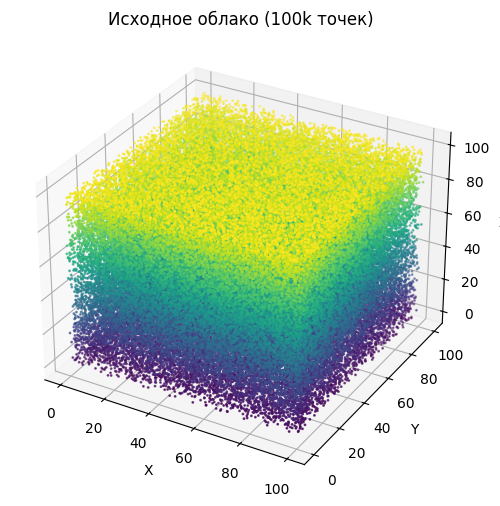

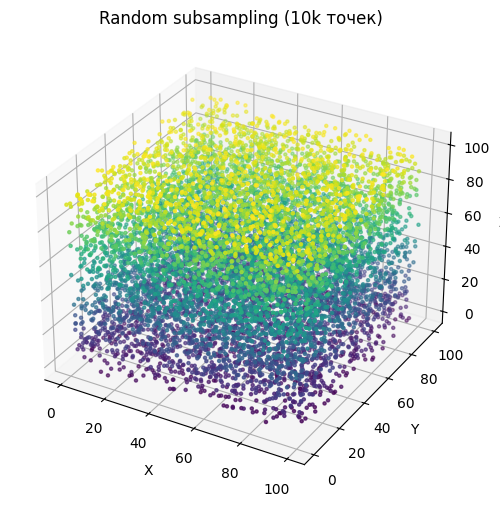

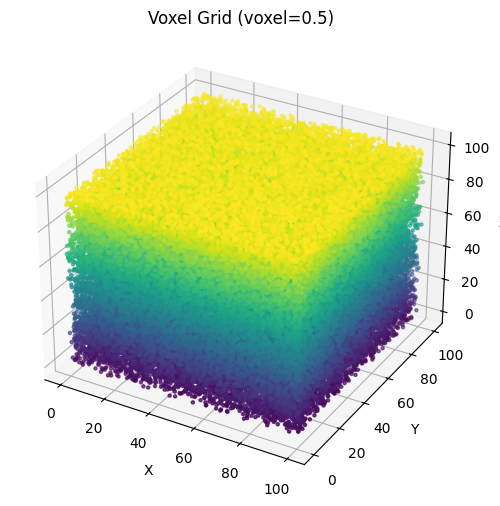

In [8]:


import numpy as np
import matplotlib.pyplot as plt
import time

num_points = 100_000
points = np.random.uniform(0, 100, size=(num_points, 3))
np.savetxt('point_cloud1.xyz', points)
print(f"Сгенерировано облако точек: {points.shape[0]} точек")


points = np.loadtxt('point_cloud1.xyz')
print(f"Загружено облако точек: {points.shape}")



def random_subsampling(points, n_samples):
    indices = np.random.choice(points.shape[0], n_samples, replace=False)
    return points[indices]

start_time = time.time()
subsampled_random = random_subsampling(points, 10_000)
print(f"Random subsampling заняло {time.time() - start_time:.4f} секунд")
np.savetxt('subsampled_random1.xyz', subsampled_random)



def voxel_grid_subsampling(points, voxel_size):
    coords = (points / voxel_size).astype(int)
    _, unique_indices = np.unique(coords, axis=0, return_index=True)
    return points[unique_indices]

voxel_size = 0.5  # можно менять для эксперимента
start_time = time.time()
subsampled_voxel = voxel_grid_subsampling(points, voxel_size)
print(f"Voxel grid subsampling заняло {time.time() - start_time:.4f} секунд")
np.savetxt('subsampled_voxel1.xyz', subsampled_voxel)


def plot_point_cloud(points, title="Point Cloud", size=1):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], s=size, c=points[:,2], cmap='viridis')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.show()

plot_point_cloud(points, "Исходное облако (100k точек)", size=1)
plot_point_cloud(subsampled_random, "Random subsampling (10k точек)", size=5)
plot_point_cloud(subsampled_voxel, f"Voxel Grid (voxel={voxel_size})", size=5)

